# 成为quant的必要条件之数学

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The following table gives the substitution for different cases:

|Integral|	substitution|	$h(x)$ for  $\int_0^1h(x)dx$|
|---|---|---|
|\begin{equation*}\int_0^1g(x)dx\end{equation*}|No substitution| $h(x)=g(x)$|
|\begin{equation*}\int_a^bg(x)dx\end{equation*}|\begin{equation*}x=a+(b-a)y\end{equation*}|\begin{equation*}h(x)=(b-a)g\left(a+(b-a)y\right)\end{equation*}|
|\begin{equation*}\int_a^\infty g(x)dx\end{equation*}|\begin{equation*}x=\frac{1}{y}-1+a\end{equation*}|\begin{equation*}h(x)=\frac{g\left(\frac{1}{y}-1+a \right)}{y^2}\end{equation*}|
|\begin{equation*}\int_{-\infty}^b g(x)dx\end{equation*}|\begin{equation*}x=1-\frac{1}{y}+b\end{equation*}|\begin{equation*}h(x)=\frac{g\left(1-\frac{1}{y}+b \right)}{y^2}\end{equation*}|


###Practice: 
Calculate  $\int_{-4}^\infty\frac{1}{1+x^2}dx$

In [2]:
def mc_integration(a,size):
    y=np.random.rand(size)
    z=1/y-1+a
    hy=1/(1+z**2)/y**2
    return np.mean(hy)
    

In [3]:
mc_integration(-4,10000)

2.8758377982760845

Calculate  $\int_{-4}^4\frac{1}{1+x^2}dx$

In [4]:
def mc_inte(a,b,size):
    y=np.random.rand(size)
    z=a+(b-a)*y
    hy=(b-a)/(1+z**2)
    return np.mean(hy)

In [5]:
mc_inte(-4,4,10000)

2.6458973862995028

In [6]:
np.random.rand()

0.8445790427585613

In [7]:
np.random.normal(0,1)

1.0596186868736863

In [8]:
np.random.poisson(10)

9

In [9]:
np.random.exponential(10,2)

array([26.60746643,  8.9127965 ])

In [10]:
np.random.rand()

0.035594746628783924

In [11]:

def inverse(lam,size):
    u=np.random.rand(size)
    return -1/lam*np.log(u)
def compare(la,size):
    sample1=np.random.exponential(la,size)
    sample2=inverse(la,size)
    x=np.linspace(0.1,30,100000)
    y=la*np.exp(-la*x)
    plt.plot(x,y,label="Real Distribution",zorder=10)
    plt.hist(sample1,bins=300,density=True,label="Built-in Method",zorder=7)
    plt.hist(sample2,bins=300,density=True,label="Inverse Method",zorder=9)
    plt.legend()
    plt.show()

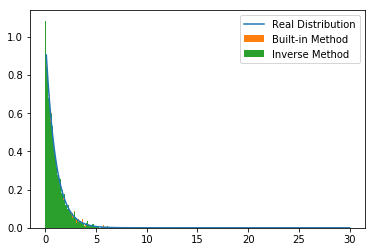

In [12]:
compare(1,10000)

In [13]:
#g(x)=1+x**2-x**3
def simple_function():
    y=np.random.rand(10000)
    hy=1+y**2-y**3
    return np.mean(hy)

In [14]:
simple_function()

1.0837782128612057

In [15]:
import sympy
y=sympy.Symbol('y')
sympy.integrate(1+y**2-y**3,(y,0,1))

13/12

In [59]:
13/12

1.0833333333333333

## HW02
### 自学Finite Difference Method，并用python写一个简单的ODE数值解(自己定义一个问题，并写出答案。)
（如果是直接参考网上的代码，请注明索引出处，否则一经发现本课程直接授予不合格。）
### Based on 10000 samples from a uniform distribution between 0 and 1,  <font color="blue">use Monte-Carlo integration to compute the following  </font >:

$\int_5^\infty \frac{1}{x^3}+\frac{1}{x^2} dx$
（不要复制最后我给的图，如果不会就写不会，没有任何关系。）

In [3]:
###Your code here:

It can be shown that the corresponding cumulative distribution function is :

$F(x;a,b)=\int _{{0}}^{{x}}f(\xi ;a,b)d\xi =1-(1-x^{a})^{b}.\ $

 -  Compute the inverse of the cdf given above.
  [Note: For this question, you can solve the inverse by hand or using sympy. <font color="green">If you solve it by hand, please present your derivation using text cell. </font>  <font color="blue">If you use sympy, please define $a$ and $b$ as symbols as well.  Solve $x$ as a function of CDF, $a$ and $b$. Do not plug in the value for $a$ and $b$. </font>]

 - <font color="blue"> Assume $a=2$ and $b=5$. Use Inverse transform sampling from a continuous distribution to generate 10000 sample from this distribution and plot the histogram of your simulation alongside the line plot of the pdf function.  Label the x axis and y axis, and also add a title to the graph. </font>  

In [7]:
#Hint: You may find Sympy useful
import sympy
a=sympy.Symbol('a')
b=sympy.Symbol('b')
print(sympy.integrate(2*a-3,(a,0,b)))
print(sympy.solve(2*a-b,b))

b**2 - 3*b
[2*a]


It should look like this:
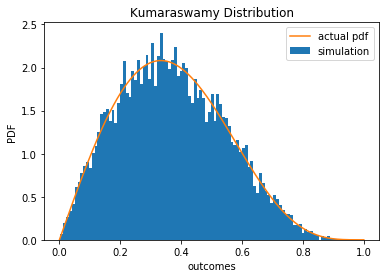

# 成为quant的必要条件之编程

In [4]:
#change problem
import numpy as np
def find_min_change(d,n):
    c=np.repeat(0,n+1)
    print_=np.repeat(0,n+1)
    for i in range(1,n+1):
        mincoin=np.inf
        address=0
        for j in range(len(d)):
            if i-d[j]>=0:
                if c[i-d[j]]+1<mincoin:
                    mincoin=c[i-d[j]]+1
                    address=j
        c[i]=mincoin
        print_[i]=address
    return c[n],print_
                
    

In [7]:
find_min_change([1,4,5,10],9)

(2, array([0, 0, 0, 0, 1, 2, 0, 0, 1, 1]))

In [8]:
def printcoin(d,n):
    totalnum,coinuse=find_min_change(d,n)
    i=0
    while(i<totalnum):
        i+=1
        print(f"{d[coinuse[n]]}")
        n-=d[coinuse[n]]

In [10]:
printcoin([1,4,5,10],12)

1
1
10


## random feature map

In [1]:
###
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn import svm, metrics,datasets
from sklearn.model_selection import train_test_split

In [2]:
iris=datasets.load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
x=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)
x.shape, X_test.shape

((150, 4), (38, 4))

In [5]:
def randomfeaturemap(dataset):
    N=dataset.shape[1]
    M=int(N*np.log(N))
    G=np.random.normal(0,1,M*N)
    G=G.reshape(M,N)
    return (np.sign(np.dot(G,dataset.T))/(M**0.5)).T

In [6]:
rx_train=randomfeaturemap(X_train)
rx_test=randomfeaturemap(X_test)
rx_test.shape

(38, 5)

In [8]:
def angular_kernel(x,y):
    dotproduct=sum([a*b for a,b in zip(x,y)])
    norm=np.linalg.norm(x,ord=2)*np.linalg.norm(y,ord=2)
    theta=np.arccos(dotproduct/norm)
    return 1-2*theta/np.pi

In [9]:
def my_kernel(X,Y):
    k=np.zeros([len(X),len(Y)])
    for i in range(len(X)):
        for j in range(len(Y)):
            k[i][j]=angular_kernel(X[i],Y[i])
    return k

In [10]:
model1=svm.SVC(kernel=my_kernel)
model1.fit(X_train,y_train)
y_p1=model1.predict(X_test)
#print(metrics.classification_report(y_test,y_p1))
#print(metrics.confusion_matrix(y_test,y_p1))
print(metrics.accuracy_score(y_test,y_p1))
print(y_test)
print(y_p1)


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in arccos
  after removing the cwd from sys.path.


0.3157894736842105
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


In [11]:
model2=svm.SVC()
model2.fit(rx_train,y_train)
y_p2=model2.predict(rx_test)
#print(metrics.classification_report(y_test,y_p1))
#print(metrics.confusion_matrix(y_test,y_p1))
print(metrics.accuracy_score(y_test,y_p2))
print(y_test)
print(y_p2)


0.2894736842105263
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [12]:
model3=svm.SVC(kernel='rbf')
model3.fit(X_train,y_train)
y_p3=model3.predict(X_test)
#print(metrics.classification_report(y_test,y_p1))
#print(metrics.confusion_matrix(y_test,y_p1))
print(metrics.accuracy_score(y_test,y_p3))
print(y_test)
print(y_p3)


1.0
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [13]:
def markovstock(p):
    while True:
        step=np.random.normal(0,1)
        p+=step
        if p>=0:
            yield p
        else:
            return

In [14]:
gen=markovstock(10)

In [15]:
trace=[]
for i in range(120):
    newp=next(gen)
    trace.append(newp)

In [16]:
trace

[10.2175426648372,
 10.652465635101898,
 9.356865216008934,
 9.894845961838277,
 9.192642786451387,
 9.861804894510811,
 9.49438293856341,
 8.30532254498706,
 9.618971506980103,
 8.441103798014447,
 5.873839585536988,
 5.221948875922991,
 4.458918708805989,
 3.0687820513427044,
 3.3366840348463995,
 1.951275040965908,
 4.327564407132316,
 6.118834446919111,
 5.924807023117786,
 6.250623394228202,
 4.995338235537361,
 3.8355794685981106,
 4.103974549920324,
 3.6770887251086415,
 2.9862905296203293,
 1.376894429934935,
 2.2816112883645783,
 3.083186531056812,
 2.16770564546642,
 2.67263464412285,
 2.3187649940315804,
 3.014750313737654,
 4.866391453930756,
 5.137161661068717,
 5.941813311542319,
 7.717975137011515,
 8.655092422744685,
 7.995014626376287,
 7.3217157622508395,
 8.305415302061064,
 8.70540943678878,
 9.366469618639133,
 9.846078348307117,
 10.389821912900233,
 12.706677477956244,
 14.198010730726956,
 13.46737347452768,
 12.151889475647442,
 13.234780642671746,
 13.25629208

## HW03
Investing for someone who knows the Future: You are given the prices of a stock for each of the next n days. You can buy once and sell once and you want to maximize your profit.

>Example  
Day 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16  
Price 70 90 40 27 69 80 13 50 35 75 51 53 56 10 15 41

 Questions:
 * How long does the naive algorithm take?
 * Can we improve this with divide and conquer?
 * Give a DP code

### How long does the naive algorithm take?

$$\sum_{i=1}^{n-1} (n-i) = O(n^2)$$

### Can we improve this with divide and conquer?

想不出怎么用分治法求解，下面是用递归法求解的code

In [19]:
ll = [70, 90, 40, 27, 69, 80, 13, 50, 35, 75, 51, 53, 56, 10, 15, 41]

In [22]:
def t(ll, profit):
    if len(ll) == 1:
        return profit
    for i in ll[1:]:
        if i-ll[0] > profit:
            profit = i-ll[0]
    return t(ll[1:], profit)

In [23]:
t(ll, 0)

62

### Give a DP code

不好意思，老师，我算法不太懂。。。